## Imports

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress

from datetime import datetime
import random
import os
import seaborn as sns
import importlib
from itertools import product

from PIL import Image
from sklearn.cluster import KMeans

In [ ]:
np.set_printoptions(linewidth=160)
np.get_printoptions()['linewidth']

In [3]:
from skimage.segmentation import slic
from skimage.color import rgb2lab, lab2rgb
from skimage.util import img_as_ubyte
from skimage.measure import regionprops

from skimage.filters import gaussian
from skimage.morphology import dilation, disk

from skimage.filters.rank import gradient

In [4]:
# from skimage.transform import rotate

# from scipy.ndimage import rotate

Regarding file extensions:
I chose .png because:

1. PNG is lossless, meaning it preserves the exact pixel values from your segmentation. This is crucial for segmentation results where you want to maintain precise boundaries and color values.
2. JPEG (.jpg) uses lossy compression that can introduce artifacts, especially around sharp edges like segmentation boundaries, which could distort your results.
3. PNG supports transparency if your segmentation includes it.
4. For segmentation maps with limited colors (which is common), PNG files are often more efficient than alternatives.

The best extension really depends on:

- If preserving exact pixel values is critical: use PNG
- If file size is more important than perfect quality: JPEG could work, but might introduce artifacts
- If you need transparency: PNG
- If your segmentation uses indexed colors with few unique values: PNG is typically better

For image segmentation results, PNG is generally the safer choice to preserve the integrity of your segmentation boundaries and colors.

## Start

In [10]:
import src.ArT_functions
import src.comic_book
import src.general_functions
import src.move_shapes
import src.koike_sauvin
import src.color_madness
import src.colorz

importlib.reload(src.ArT_functions)
importlib.reload(src.comic_book)
importlib.reload(src.general_functions)
importlib.reload(src.move_shapes)
importlib.reload(src.koike_sauvin)
importlib.reload(src.color_madness)
importlib.reload(src.colorz)

from src.ArT_functions import *
from src.comic_book import *
from src.general_functions import *
from src.move_shapes import *
from src.koike_sauvin import *
from src.color_madness import *
from src.colorz import *

In [11]:
input_image_path = 'input/1705_JesseMetz1439.jpg'
# input_image_path = 'input/elisabeth_ruijgrok_2.jpg'
# input_image_path = 'input/Liza_1.jpg'
output_image_path = 'output/output_image.jpg'
# input_image = extract_square(input_image_path, target_size=1000)
# input_image = extract_square_mod(input_image_path, target_size=500, move_vertical=.65, move_horizontal=.9, zoom=.7)
input_image = extract_square_mod(input_image_path, target_size=1000, move_vertical=.8, move_horizontal=1, zoom=.8)
# input_image = extract_square(input_image_path)
# input_image

input_image.save("input/input_square.png")

## Koike-Sauvin

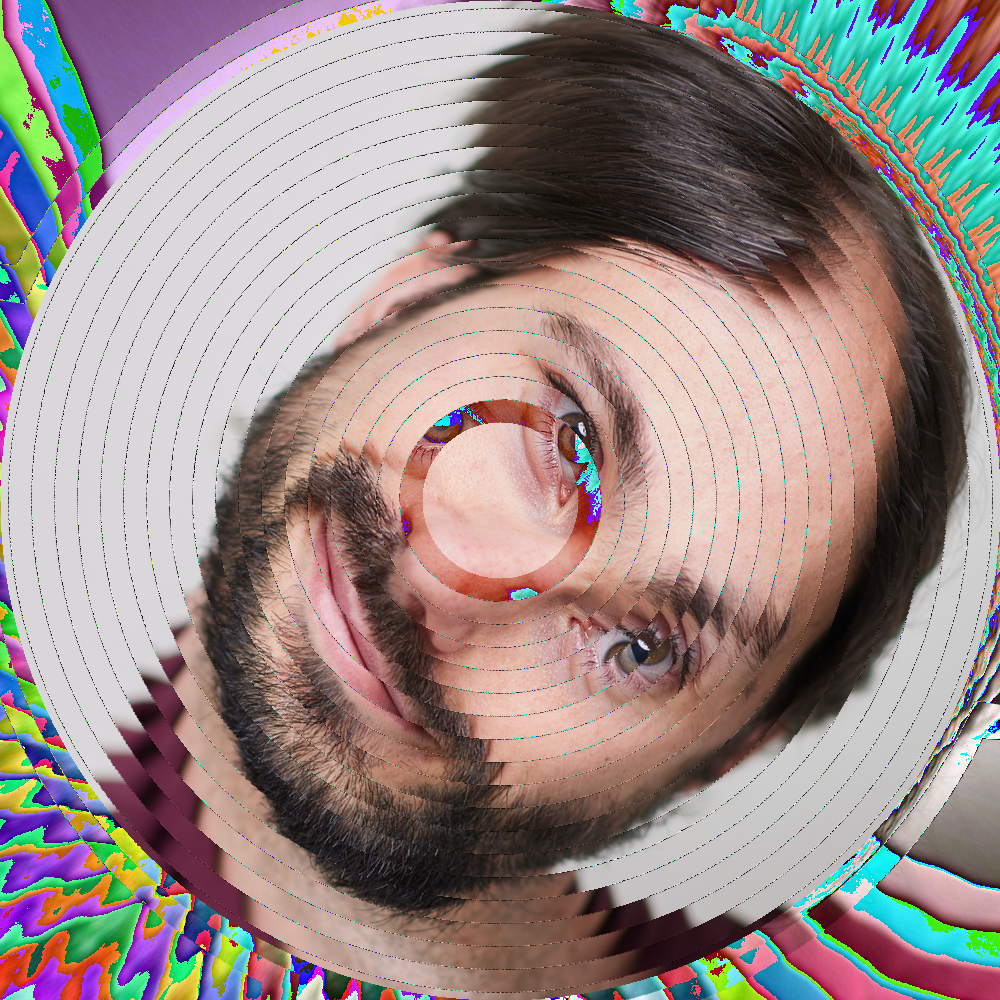

In [133]:
# center = (int(.453*width), int(.344*height))
center = None
# altered_image = apply_circular_cutout_effect(input_image, num_rings=20, max_rotation=-45, center=center)
altered_image = create_spiral_cutout(input_image, num_rings=20, rotation_max=-90, center_size_factor=3.4, center=center)

# save_image_with_unique_name(altered_image, output_image_path)
altered_image

## Move boxes

In [ ]:
stop

In [8]:
# altered_image

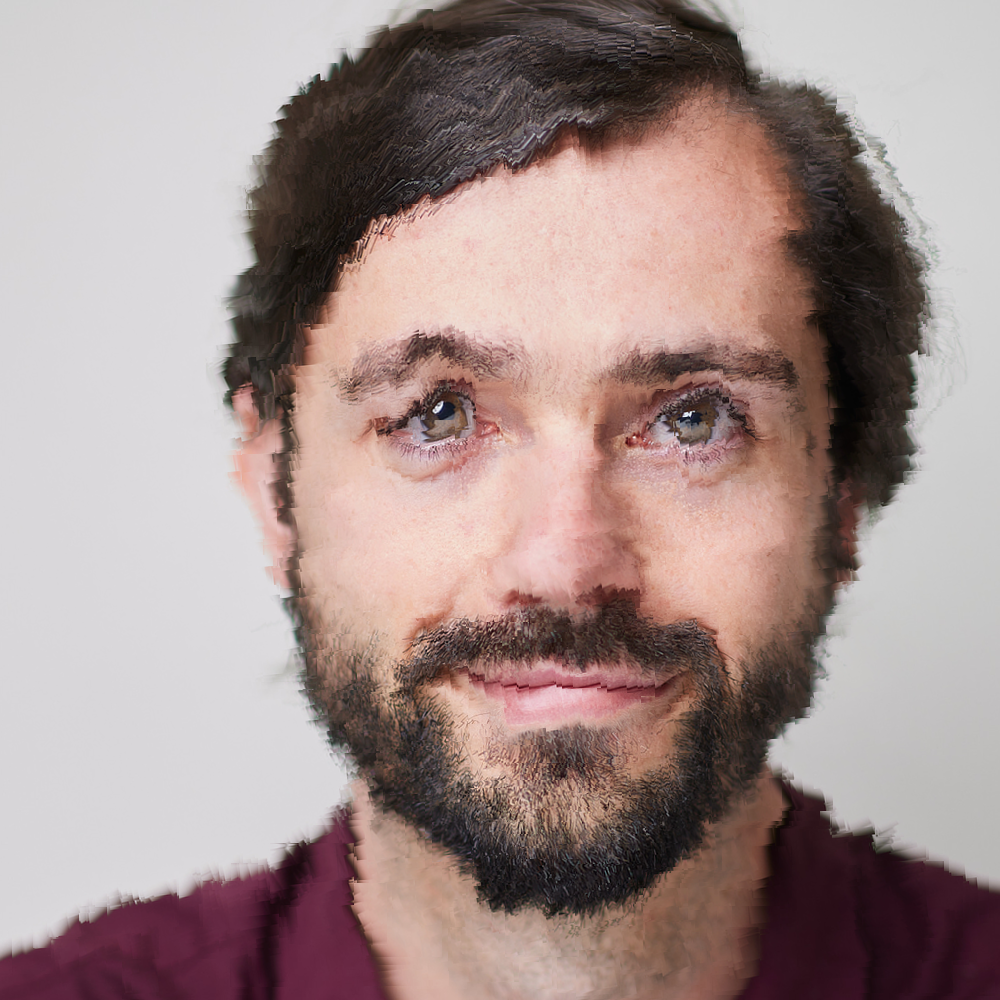

In [134]:
# altered_image = alter_image_init(input_image, num_fragments=100, offset_ratio=.1)
# altered_image = alter_image_boxes_away_from_center(input_image, num_rectangles=1000)
# altered_image = alter_image_boxes(input_image, num_rectangles=10000, magnitude=.1)
# altered_image = alter_image_boxes_rotation_basic(input_image, num_rectangles=1000, magnitude=1, rotation_range=10)
altered_image = alter_image_boxes_rotation(input_image, shape_size=1, num_rectangles=1000, magnitude_shift=.01, rotation_mean=5, rotation_var=0)
# altered_image = alter_image_shapes_with_border_expansion_2(input_image, shape_type="rectangle", shape_size=4,
#                                                            num_shapes=1, magnitude_shift=0, rotation_mean=10, rotation_var=0)

altered_image

In [ ]:
save_image_with_unique_name(altered_image, output_image_path)

## Segments

### Functions

In [7]:
def kleur(c):
    return tuple(channel / 255 for channel in c)

def show_colors(colors):
    fig, ax = plt.subplots(figsize=(14, .2))
    
    for i in range(len(colors)):
        color = kleur(colors[i])
        ax.plot(i, 1, 'o', color=color, ms=10)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False);

### go

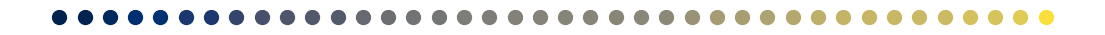

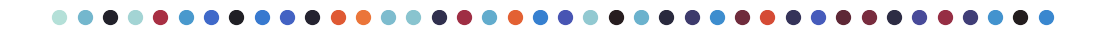

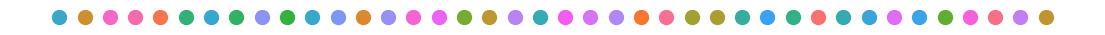

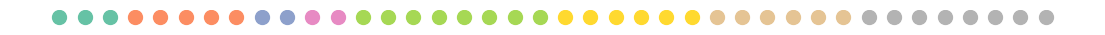

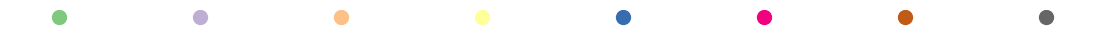

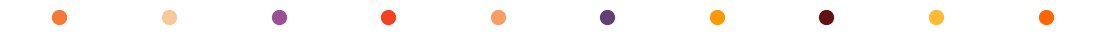

In [12]:
show_colors(get_matplotlib_palette('cividis'))
show_colors(get_seaborn_palette('icefire'))
show_colors(get_seaborn_palette('husl'))
show_colors(get_matplotlib_palette('Set2'))
show_colors(get_colorbrewer_palette('Accent'))
show_colors(get_nature_palette('sunset'))

In [13]:
base_number_of_regions_values = [6, 20, 50, 100]
compactness_values = [0.1, 1, 5, 10, 50]
blur_sigma_values = [15, 50, 100, 300]
gradient_disk_size_values = [1, 5, 30, 100, 600]
variance_threshold_values = [0.01, 0.2, 10, 100, 600]

In [14]:
base_number_of_regions_values = [40]
compactness_values = [5]
blur_sigma_values = [2]
gradient_disk_size_values = [3, 50]
variance_threshold_values = [0.2, 30]

In [15]:
base_number_of_regions_values = [7, 19, 51]
compactness_values = [0.1, 5, 50]
blur_sigma_values = [15, 30, 100]
gradient_disk_size_values = [3, 50, 700]
variance_threshold_values = [0.2, 107, 315]

In [16]:
total_combinations = (len(base_number_of_regions_values) * 
                     len(compactness_values) * 
                     len(blur_sigma_values) * 
                     len(gradient_disk_size_values) * 
                     len(variance_threshold_values))

print(f"Running {total_combinations} combinations...")

Running 243 combinations...


C:\Users\T40165\AppData\Local\Temp\ipykernel_7000\889358886.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(palette_name, min(plt.cm.get_cmap(palette_name).N, 256))


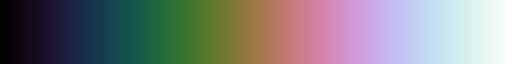

In [17]:
# print (plt.colormaps())
palette_name = 'cubehelix'

cmap = plt.cm.get_cmap(palette_name, min(plt.cm.get_cmap(palette_name).N, 256))
cmap

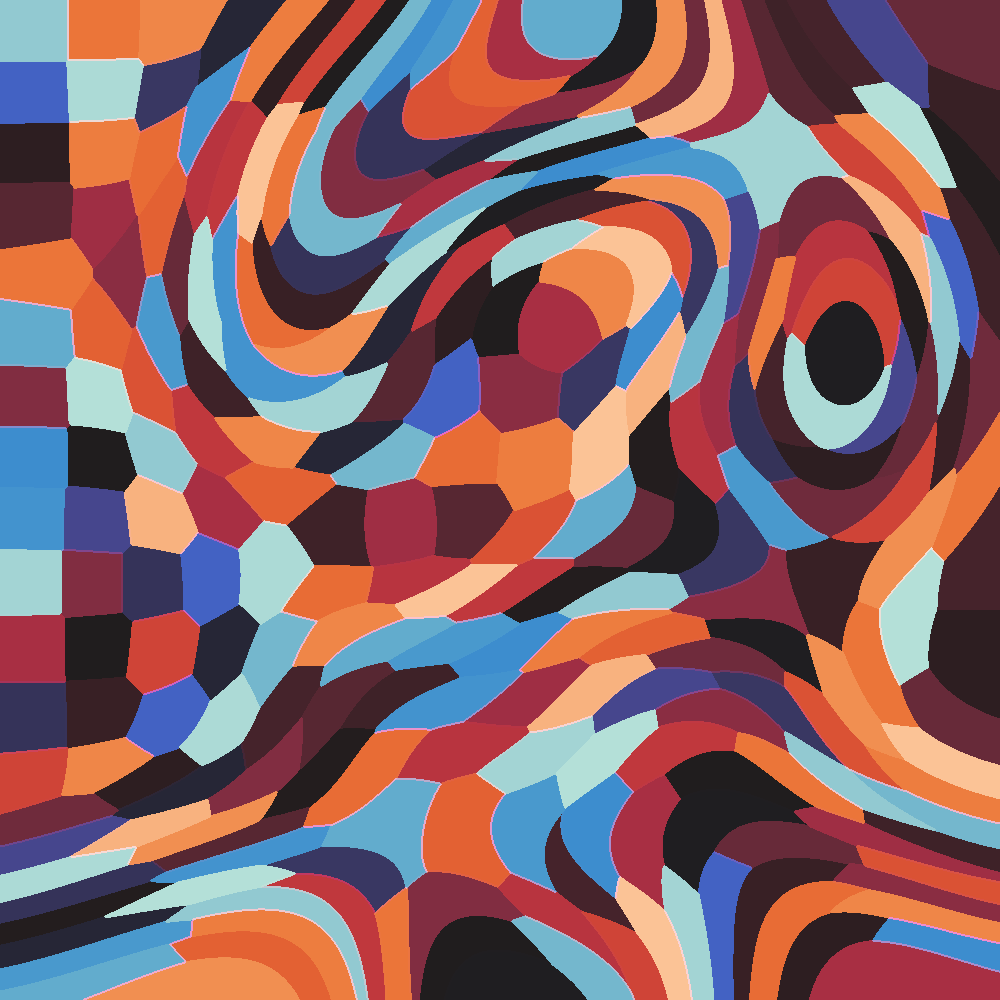

In [15]:
color_palette = get_matplotlib_palette('Set2')
color_palette = get_seaborn_palette('icefire')
# color_palette = get_colorbrewer_palette('RdYlGn')
# color_palette = get_colorbrewer_palette('cubehelix')
# color_palette = get_distinct_colors()
# color_palette = get_tableau_palette('TableauDark_10')
# color_palette = get_nature_palette('forest')
# color_palette = get_colorbrewer_palette('Accent')


segmented_img = segment_image_with_variance_based_regions_2(
    img=input_image,
    base_number_of_regions = 272,
    color_palette=color_palette,
    compactness            = 2.84,
    blur_sigma             = 84,
    gradient_disk_size     = 507,
    variance_threshold     = 44.12,
    noise_level=0,
)
segmented_img

In [70]:
save_image_with_unique_name(segmented_img, output_image_path)

'output/output_image_1.jpg'

In [42]:
palette_names = ["deep", "muted", "bright", "pastel", "dark", "colorblind", "hls", "husl", "cubehelix", "Blues"]

n_palettes = len(palette_names)
fig, axes = plt.subplots(len(palette_names), 1, figsize=(10, 1 * len(palette_names)))

for ax, name in zip(axes, palette_names):
    colors = sns.color_palette(name, 15)
    for i, color in enumerate(colors):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.set_xlim(0, len(colors))
    ax.set_title(name, loc='left', fontsize=12)
    ax.axis('off')
plt.tight_layout()

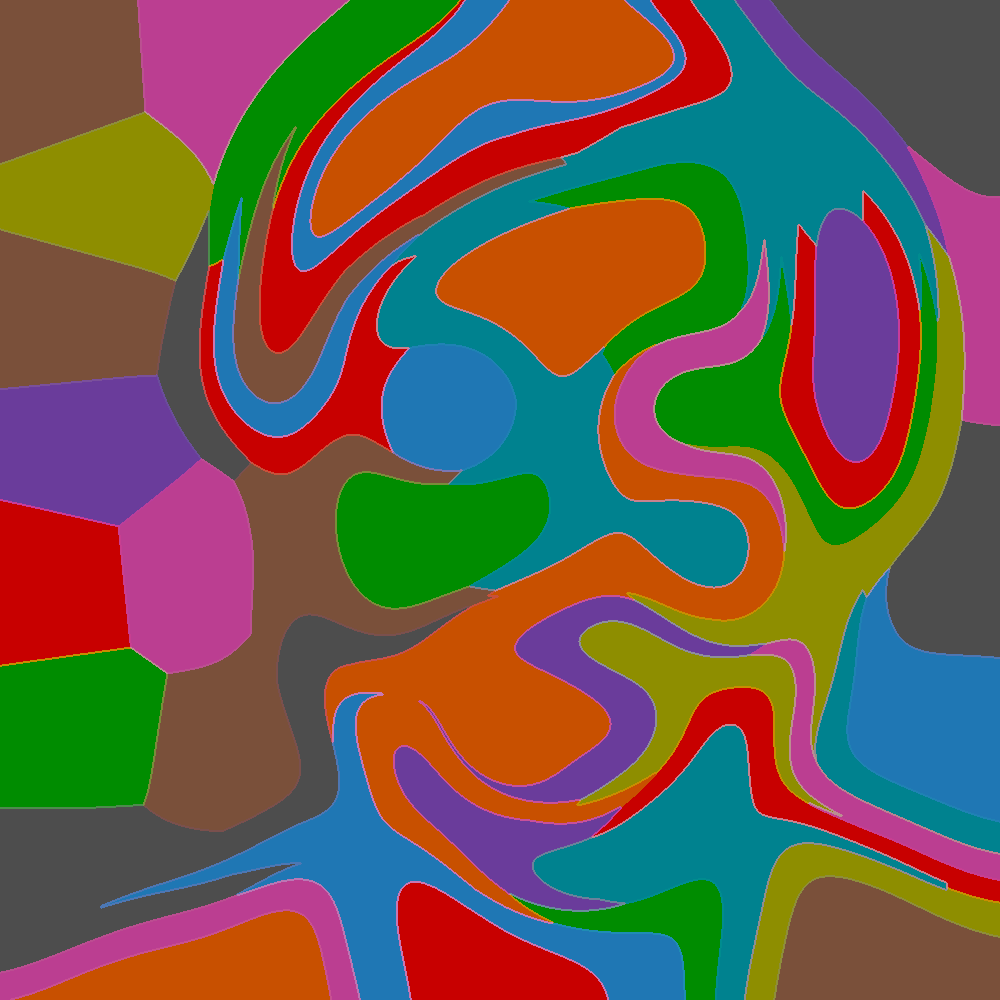

In [92]:
regions      = 272
compactness  = 2.84
blur         = 84
disk_size    = 507
variance     = 44.12

regions      = 60
compactness  = 5
blur         = 40
disk_size    = 5
variance     = .2

palette      = 'sunset'
palette      = 'cubehelix'
palette      = 'hls'
palette      = 'ColorBlind_10'
palette      = 'TableauDark_10'
# palette      = 'distinct_colors'

# color_palette = get_colorbrewer_palette(palette)
# color_palette = get_nature_palette(palette)
# color_palette = get_seaborn_palette(palette)
color_palette = get_tableau_palette(palette)
# color_palette = get_distinct_colors(2)

segmented_img = segment_image_with_variance_based_regions_2(
    img=input_image,
    base_number_of_regions=regions,
    color_palette=color_palette,
    compactness=compactness,
    blur_sigma=blur,
    gradient_disk_size=disk_size,
    variance_threshold=variance,
    noise_level=0,
)

# save_image_with_unique_name(segmented_img, f"output/segments_A{regions}_B{compactness:.2f}_C{blur}_D{disk_size}_E{variance:.2f}_{palette}.png")
segmented_img

In [90]:
save_image_with_unique_name(segmented_img, f"output/segments_A{regions}_B{compactness:.2f}_C{blur}_D{disk_size}_E{variance:.2f}_{palette}.png")

'output/segments_A60_B5.00_C40_D5_E0.20_TableauDark_10_5.png'

### thousands

In [44]:
# Define parameter ranges
# regions_lower, regions_upper = 3, 550
# compactness_lower, compactness_upper = 0.01, 50
# blur_lower, blur_upper = 5, 600
# disk_size_lower, disk_size_upper = 1, 1000
# variance_lower, variance_upper = 0.02, 200

regions_lower, regions_upper = 7, 200
compactness_lower, compactness_upper = 0.01, 50
blur_lower, blur_upper = 2, 600
disk_size_lower, disk_size_upper = 3, 700
variance_lower, variance_upper = 0.2, 200


# Number of iterations
num_iterations = 1000

# Process random parameter combinations
for count in range(1, num_iterations + 1):
    # color_palette = get_seaborn_palette('icefire')
    # color_palette = get_colorbrewer_palette('RdYlGn')
    # color_palette = get_colorbrewer_palette('cubehelix')
    color_palette = get_nature_palette('sunset')
    # color_palette = get_tableau_palette('TableauDark_10')
    
    # Uniform random for regions (equal chance for all values)
    regions = random.randint(regions_lower, regions_upper)
    
    # Exponential distribution for compactness (more weight towards lower values)
    compactness = np.random.exponential(scale=5) + compactness_lower
    compactness = max(compactness_lower, min(compactness, compactness_upper))
    
    # Log-uniform distribution for blur (more chance of lower values)
    log_blur_lower = np.log(blur_lower)
    log_blur_upper = np.log(blur_upper)
    log_blur = random.uniform(log_blur_lower, log_blur_upper)
    blur = int(np.exp(log_blur))
    
    # # Power-law distribution for disk size (more weight towards lower values)
    disk_size = int((random.random() ** 0.5) * (disk_size_upper - disk_size_lower) + disk_size_lower)
    
    # # Exponential distribution for disk size (more weight towards lower values)
    # disk_size = np.random.exponential(scale=5) + disk_size_lower
    # disk_size = int(max(disk_size_lower, min(disk_size, disk_size_upper)))
    
    # Beta distribution for variance (can control shape to favor lower or upper range)
    variance = np.random.beta(2, 5) * (variance_upper - variance_lower) + variance_lower

    # Create parameter-specific filename suffix with a/b/c/d/e notation
    param_suffix = f"A{regions}_B{compactness:.2f}_C{blur}_D{disk_size}_E{variance:.2f}"
    full_output_path = f"output/segments_{param_suffix}.png"
    
    print(f"Iteration {count}/{num_iterations}: {param_suffix}")
    
    # Run segmentation with current parameter set
    segmented_img = segment_image_with_variance_based_regions_2(
        img=input_image,
        base_number_of_regions=regions,
        color_palette=color_palette,
        compactness=compactness,
        blur_sigma=blur,
        gradient_disk_size=disk_size,
        variance_threshold=variance,
        noise_level=0,
    )
    
    # Save the result with parameters in filename
    save_image_with_unique_name(segmented_img, full_output_path)

print(f"Total iterations completed: {num_iterations}")

Iteration 1/1000: A180_B3.86_C4_D558_E46.67
Iteration 2/1000: A141_B25.15_C21_D550_E95.48
Iteration 3/1000: A167_B6.77_C3_D646_E84.52
Iteration 4/1000: A110_B9.03_C262_D626_E109.70
Iteration 5/1000: A102_B12.00_C42_D423_E21.83
Iteration 6/1000: A97_B12.56_C86_D480_E45.06
Iteration 7/1000: A85_B16.05_C573_D508_E37.71
Iteration 8/1000: A55_B14.50_C3_D654_E99.31
Iteration 9/1000: A193_B0.32_C6_D329_E46.23
Iteration 10/1000: A151_B1.03_C85_D592_E58.81
Iteration 11/1000: A121_B0.47_C447_D339_E104.57
Iteration 12/1000: A72_B5.98_C269_D279_E51.77
Iteration 13/1000: A175_B5.18_C22_D326_E23.03
Iteration 14/1000: A32_B3.38_C9_D394_E156.39
Iteration 15/1000: A49_B1.11_C15_D193_E22.51
Iteration 16/1000: A153_B5.90_C4_D353_E25.91
Iteration 17/1000: A53_B1.49_C175_D602_E19.41
Iteration 18/1000: A152_B1.64_C28_D369_E73.82
Iteration 19/1000: A97_B0.36_C60_D664_E27.08
Iteration 20/1000: A189_B2.55_C22_D500_E47.07
Iteration 21/1000: A45_B2.77_C2_D572_E47.42
Iteration 22/1000: A78_B21.67_C338_D606_E29.45

## rest

##### Gradient-Based Variance Map:
A local gradient filter is applied to estimate the variation in pixel intensities. Regions with high gradients indicate areas of high variation.

##### Dynamic Region Scaling:
The gradient_scaled_regions is calculated by scaling the base number of regions dynamically based on the gradient values. This ensures larger regions in low-variation areas and smaller regions in high-variation areas.

##### Variance Threshold:
The variance_threshold parameter controls how strongly the number of regions is adjusted based on the variance.

##### Gradient Disk Size:
The gradient_disk_size parameter determines the size of the neighborhood used to calculate local variance. Larger values smooth out the variance map more.

In [29]:
def segment_image_with_spatial_constraints(img, number_of_regions, region_size_factor=5, color_style="colors"):
    img_array = np.array(img)

    # Convert image to LAB color space for better color segmentation
    img_lab = rgb2lab(img_array)

    # Calculate the maximum size per region based on the image width
    max_region_size = img.width // region_size_factor
    
    # Perform SLIC segmentation
    segments = slic(
        img_lab,
        n_segments=number_of_regions,
        compactness=10,  # Balances color similarity and spatial proximity; adjust if needed
        max_size_factor=max_region_size,
        start_label=1,
    )

    # Replace each segment with a random color
    if color_style == "colors":  # Random colors
        segmented_img = np.zeros_like(img_array)
        for region in regionprops(segments):
            coords = region.coords
            random_color = np.random.randint(0, 256, size=3)  # Generate a random RGB color
            segmented_img[coords[:, 0], coords[:, 1]] = random_color
    else:  # 
        segmented_img = np.zeros_like(img_array)
        for region in regionprops(segments):
            # Get pixel indices for each region
            coords = region.coords
            # Average the color of each region
            average_color = np.mean(img_array[coords[:, 0], coords[:, 1]], axis=0)
            # Fill the region with the average color
            segmented_img[coords[:, 0], coords[:, 1]] = average_color

    # Convert back to PIL image
    segmented_img_pil = Image.fromarray(img_as_ubyte(segmented_img))
    return segmented_img_pil

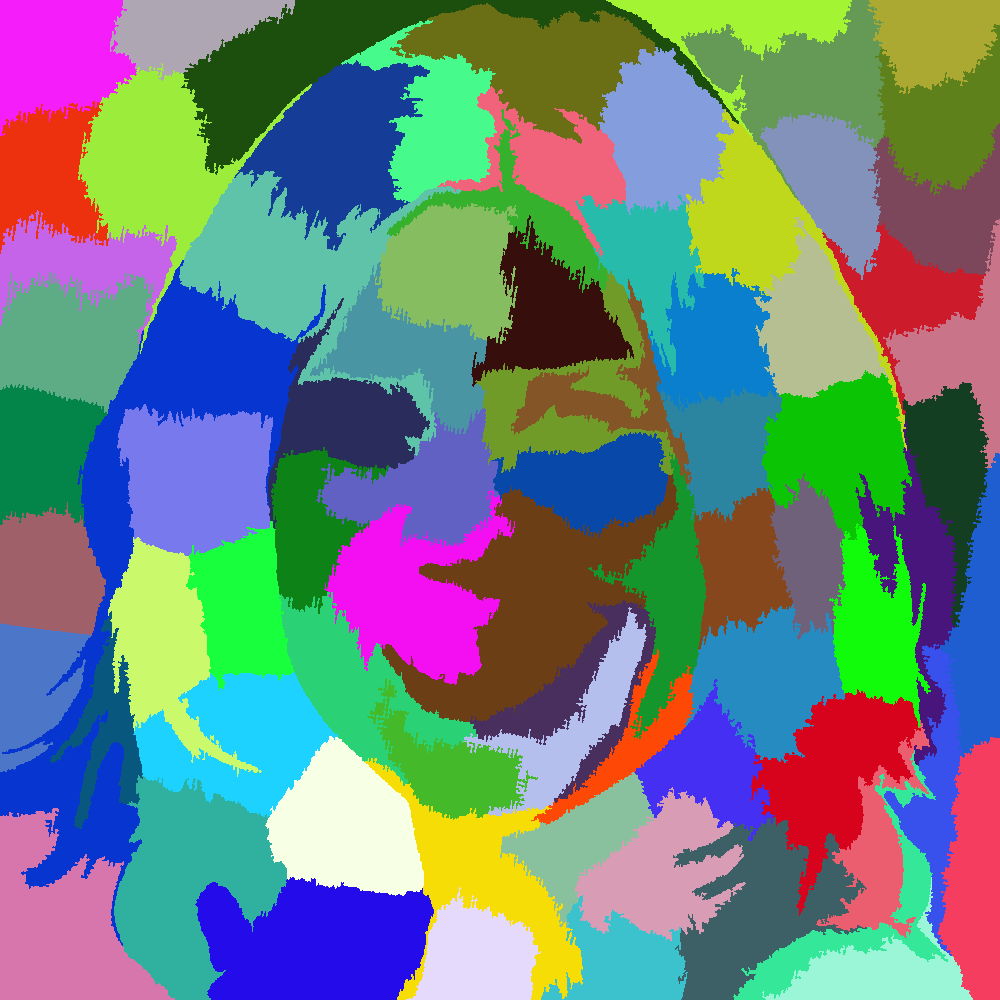

In [30]:
segmented_img = segment_image_with_spatial_constraints(input_image, number_of_regions=100, color_style="colors")

# # save_image_with_unique_name(segmented_img, output_image_path)
segmented_img

## Experi's